**************************************************INITIALIZATION*********************************************************

In [1]:
from tjmonopix.tjmonopix import TJMonoPix
from tjmonopix.analysis.plotting import plotting
import time

plot=plotting()
chip = TJMonoPix()
chip['CONF']['DEF_CONF_N'] = 0
chip['CONF']['AB_SELECT'] = 1
chip['CONF'].write()
chip.init()

# chip['data_rx'].CONF_START_FREEZE = 15 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# #chip['data_rx'].CONF_STOP_FREEZE = 250 #default 40
# chip['data_rx'].CONF_START_READ = 35 #default 6
# chip['data_rx'].CONF_STOP_READ = 37 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45
# #chip['data_rx'].CONF_STOP = 255 #default 45

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45

chip.power_on()

chip['CONF']['RESET_BCID'] = 1
chip['CONF']['RESET'] = 1
chip['CONF'].write()

chip['CONF']['EN_BX_CLK'] = 1
chip['CONF']['EN_OUT_CLK'] = 1
chip['CONF'].write()
 
chip['CONF']['RESET_BCID'] = 0
chip['CONF']['RESET'] = 0
chip['CONF'].write()

chip['DACMON_ICASN'].set_current(0.5, unit='uA')

chip.default_conf()

#-------------------------------------------------#
chip.set_icasn_dacunits(0,0)
chip.set_vreset_dacunits(35,0)
chip.set_ireset_dacunits(2,1,0)
chip.set_ithr_dacunits(5,0)
chip.set_idb_dacunits(50,0)

chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_TEST_PATTERN'].setall(False)

chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)

chip['CONF_SR']['SWCNTL_ICASN']=True

chip.write_conf()

chip['CONF']['DEF_CONF_N'] = 1
chip['CONF'].write()

2018-04-20 21:15:32,056 - [root           ] - ERROR   'NoneType' object has no attribute 'WriteExternal'
2018-04-20 21:15:32,085 - [root           ] - INFO    Found USB board(s): USBpix with ID 207 (FW 15)
2018-04-20 21:15:32,091 - [root           ] - INFO    Programming FPGA: tjmonopix_mio.bit...
2018-04-20 21:15:40,048 - [root           ] - INFO    Success!
2018-04-20 21:15:40,466 - [root           ] - INFO    Found adapter card: General Purpose Analog Card with ID 1
2018-04-20 21:15:40,488 - [root           ] - INFO    Initializing fifo (firmware version: 2), module basil.HL.sram_fifo, base_addr 0x18000
2018-04-20 21:15:40,491 - [root           ] - INFO    Initializing gpio (firmware version: 0), module basil.HL.gpio, base_addr 0x10000
2018-04-20 21:15:40,494 - [root           ] - INFO    Initializing spi (firmware version: 2), module basil.HL.spi, base_addr 0x11000
2018-04-20 21:15:40,497 - [root           ] - INFO    Initializing inj (firmware version: 3), module basil.HL.pulse_ge

4098


****************************************************POWER_STATUS*********************************************************

In [3]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
chip.get_power_status()

{'VDDA [V]': 1.7935596696606788,
 'VDDA [mA]': 56.89565359716501,
 'VDDA_DAC [V]': 1.798314513944223,
 'VDDA_DAC [mA]': 3.53162464064632,
 'VDDD [V]': 1.7967635310621244,
 'VDDD [mA]': 8.072282509499386,
 'VDDP [V]': 1.7947520410410414,
 'VDDP [mA]': 152.2975270291968}

****************************ENABLE_COLUMS, SET MASKS, SELECT WHICH COLUMN AND ROW TO INJECT******************************

In [4]:
# SELECT WHICH DOUBLE COLUMNS TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW

#chip['CONF_SR']['EN_PMOS'][9] = 1
chip['CONF_SR']['EN_PMOS'].setall(True)
#chip['CONF_SR']['EN_HITOR_OUT'][1] = 0

# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV
chip.mask(1,67,179)
chip.mask(1,82,65)
chip.mask(1,42,34)
chip.mask(1,12,62)
chip.mask(1,48,183)
chip.mask(1,87,71)
chip.mask(1,29,23)
chip.mask(1,70,191)
chip.mask(1,86,88)
chip.mask(1,15,123)
chip.mask(1,22,154)
chip.mask(1,21,22)
chip.mask(1,68,32)
chip.mask(1,55,173)
chip.mask(1,58,186)
chip.mask(1,99,56)

# ADDED FOR PWELL=0
chip.mask(1,12,216)


#chip['CONF_SR']['MASKD'][31] = True
#chip['CONF_SR']['MASKH'][99] = False

# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
#chip['CONF_SR']['COL_PULSE_SEL'][130]=True

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
chip.enable_injection(1,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

************CONFIGURE THE FRONT END CURRENT AND VOLTAGE BIASES, CONFIGURE THE HEIGHT OF THE INJECTION PULSE**************

In [301]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
chip.set_vl_dacunits(44,1)
chip.set_vh_dacunits(79,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(35,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(5,1) #680pA

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(15,1) #500nA

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(50,1) #500nA

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

vl = 1.00862204724V
vh = 1.50468503937V
vreset = 1.05106299213V
icasn = 4.375nA
ireset = 0.1025390625nA, high leakage mode
ithr = 0.8203125nA
idb = 280.0nA
ibias = 557.8125nA


******************INITIALIZE COMMUNICATION, RECEIVE DATA (CHECK IF DATA ARE SENT WITH EACH EXCECUTION)*******************

In [305]:
# chip['data_rx'].CONF_START_FREEZE = 15 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# chip['data_rx'].CONF_START_READ = 35 #default 6
# chip['data_rx'].CONF_STOP_READ = 37 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45

#chip['data_rx'].reset()
#chip['CONF']['AB_SELECT'] = 1
#chip['CONF'].write()

chip['data_rx'].set_en(True)

x = chip['fifo'].get_data()

ix = chip.interprete_data(x)
print(len(ix))
print(ix)

0
[]


****************************SET THE INJECTION PULSE PARAMETERS, INJECT x times and get the data**************************

In [ ]:
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220]=True
for row in range(80,100):
    chip.enable_injection(1,18,row)

chip.write_conf()

In [268]:
import numpy as np

#chip['inj'].reset()

repeat=1000
sleeptime=repeat*0.00003
delay=800
width=250
noise_en=0
col=18
row=99

chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_en(0)

while not chip['inj'].is_ready:
    time.sleep(0.001)

for _ in range(10):
    chip['inj'].is_ready

chip["inj"].start()
time.sleep(sleeptime)

x = chip['fifo'].get_data()
ix = chip.interprete_data(x)

print(len(ix))
#print(ix)

ixd=np.delete(ix, np.where((ix['col']!=col)|(ix['row']!=row))[0])
uniquerow, countrow = np.unique(ixd['row'], return_counts=True)

if countrow.size !=0:
    print col, uniquerow[0], countrow[0]

1031
18 99 1000


In [295]:
chip['DACMON_ICASN'].set_current(0, unit='uA')
chip['CONF_SR']['SWCNTL_ICASN']=False
chip.write_conf()

In [290]:
chip['DACMON_ICASN'].set_current(14, unit='uA')
chip['CONF_SR']['SWCNTL_ICASN']=True
chip.write_conf()

******************************************INJECTION SCANS -  S-CURVE*****************************************************

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   3  13 162 435 495 500 500 500 500 500 500 500 500 500 500
  500 500 500 500 500]]


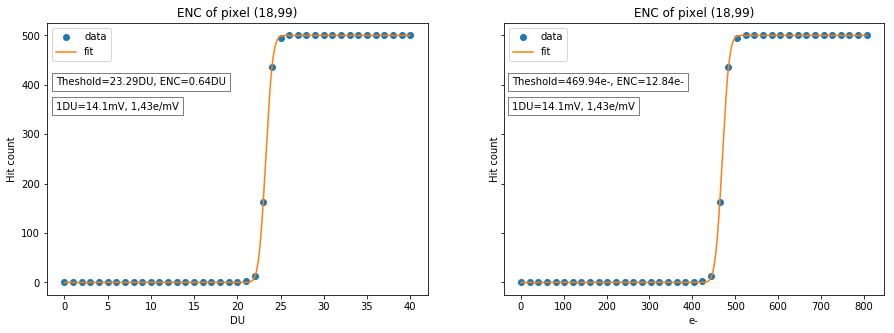

In [306]:
%matplotlib inline
import numpy as np

flavor=1
col=18
startrow=99
rownumber=1
VL=40
VHLrange=40
start_dif=0
repeat=500
delay=500
width=250
noise_en=0
analog_en=1
sleeptime=repeat*0.00002
DUtoe=20.18
#DUtoe=23
transparent=False

xhits = range(start_dif,VHLrange+start_dif+1)

hits =chip.inj_scan_row(flavor, col, startrow, rownumber, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime)
print hits
plot.plot_scurve(col, startrow, xhits, hits[0], repeat, VHLrange/2+start_dif, 0.5, 10.0, DUtoe, transparent)

In [ ]:
flavor=1
partname='bot'
col_high = 111
col_low = 0
row_high = None
row_low = None
rowstep=20

VL=40
VHLrange=40
start_dif=0
delay=1500
width=350
repeat=500
noise_en=0
analog_en=1
sleeptime=repeat*0.00005
sleeptime_step=0.01

chip.inj_scan(flavor, col_high, col_low, row_high, row_low, rowstep, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime, sleeptime_step, partname)